In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime, sys
import numpy as np

%matplotlib inline

In [2]:
def parse(t):
    string_ = str(t)
    try:
        return datetime.date(int(string_[:4]), int(string_[4:6]), int(string_[6:]))
    except:
        return datetime.date(1900,1,1)

In [3]:
def readAllFiles():
    allFiles = glob.iglob("data/atp_rankings_" + "*.csv")
    ranks = pd.DataFrame()
    list_ = list()
    for filen in allFiles:
        df = pd.read_csv(filen,
                         index_col=None,
                         header=None,
                         parse_dates=[0],
                         date_parser=lambda t:parse(t))
        list_.append(df)
    ranks = pd.concat(list_)
    return ranks

In [4]:
def readPlayers():
    return pd.read_csv("data/atp_players.csv",
                       index_col=None,
                       header=None,
                       parse_dates=[4],
                       date_parser=lambda t:parse(t))

In [ ]:
ranks = readAllFiles()
ranks = ranks[(ranks[1]<100)]
ranks = ranks.apply(lambda row: pd.Series({'ranking_date':row[0], 'ranking':row[1], 'player_id':int(row[2]), 'ranking_points':row[3]}), axis=1)
players = readPlayers()
plRanks = ranks.merge(players,right_on=0,left_on="player_id")
plRanks["B"] = plRanks["ranking_date"] - plRanks[4]
plRanks["B"] = plRanks["B"].astype(int) / (365*24*3600*1000000000.0)
agg = plRanks[["ranking_date","B"]].groupby("ranking_date")
data = agg.mean()

[<matplotlib.text.Text at 0x144320780>, <matplotlib.text.Text at 0x14437cf28>]

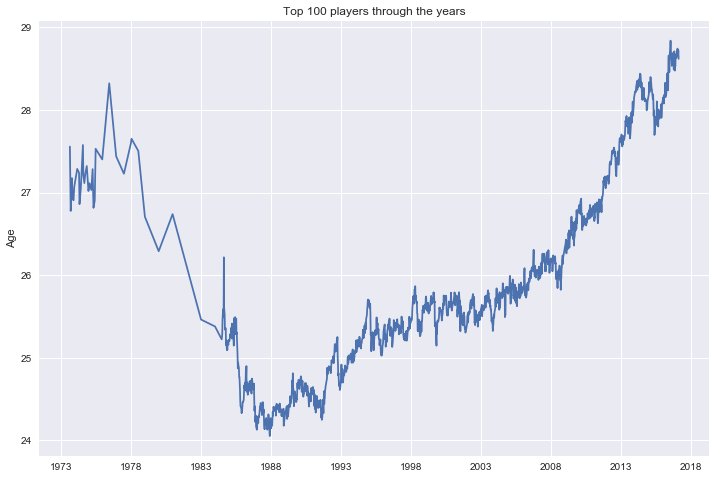

In [61]:
# since 86 the age of top 100 players has gone up

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(data.index.to_pydatetime(), data.B)
ax.set(title='Top 100 players through the years', ylabel='Age')